## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setting some initial configurations

In [2]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 14,10
# Use plot styling from seaborn.
sns.set(style='darkgrid')
# Increase the  font size.
sns.set(font_scale=1.5)

## Loading our dataset

In [3]:
import os
from os.path import join as J 
curr_dir = os.getcwd()
# print(f"The current working directory is {curr_dir}.")
# print("The current working directory contains",os.listdir(curr_dir))

In [4]:
train_data = pd.read_csv(J(curr_dir,'train.csv'))
test_data = pd.read_csv(J(curr_dir,'test.csv'))

## Preliminary Dataset Inspections

In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

<AxesSubplot:xlabel='count', ylabel='Sex'>

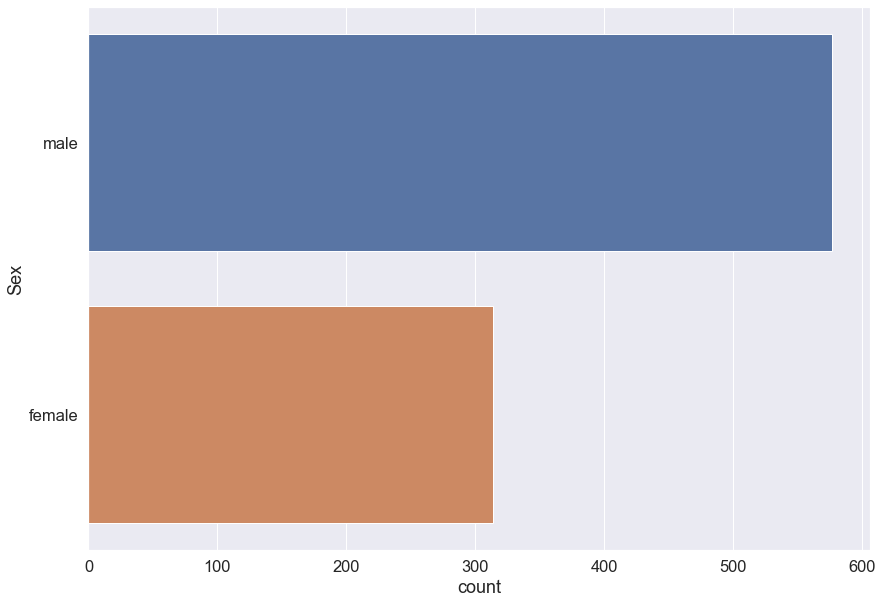

In [9]:
sns.countplot(data = train_data , y = 'Sex')

<AxesSubplot:xlabel='count', ylabel='Embarked'>

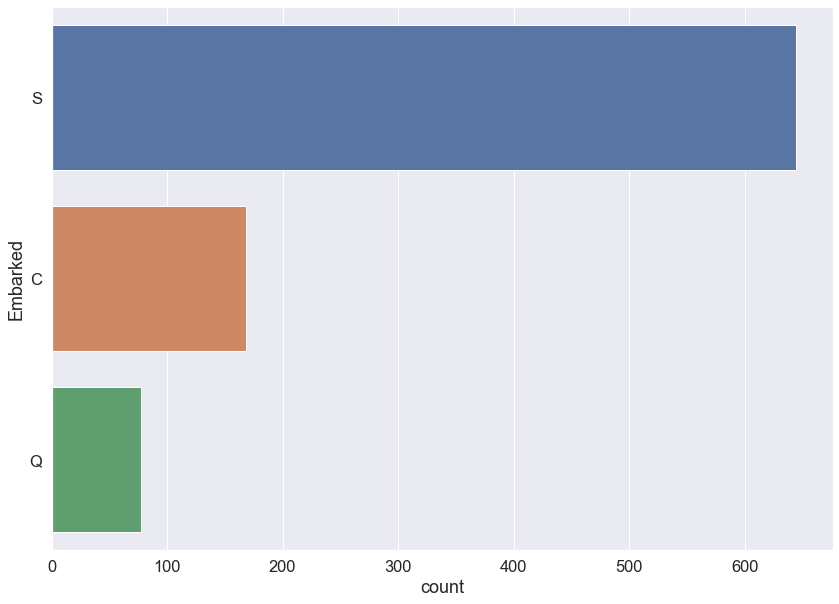

In [10]:
sns.countplot(data = train_data , y = 'Embarked')

`drop name , ticket and cabin columns`

In [11]:
numerical_columns = train_data.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<AxesSubplot:xlabel='count', ylabel='Survived'>

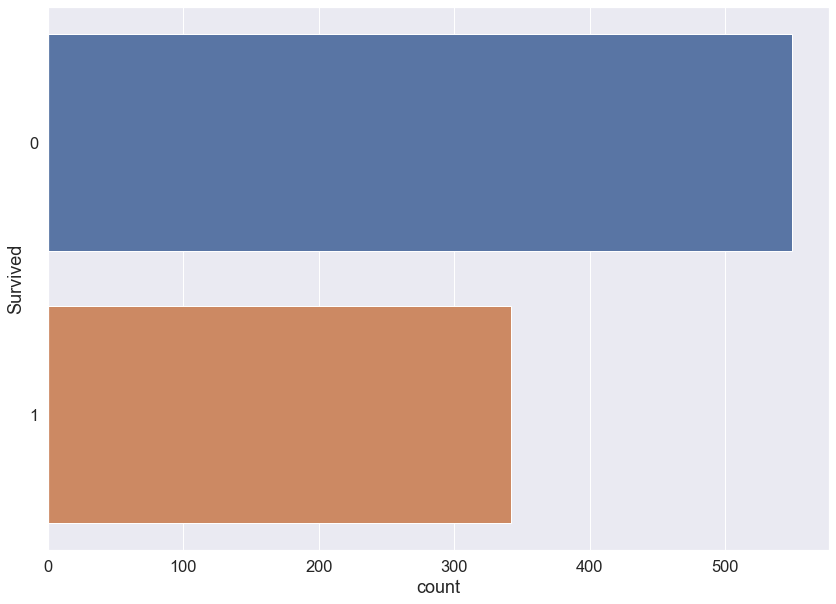

In [12]:
sns.countplot(data = train_data , y = 'Survived')

<AxesSubplot:xlabel='count', ylabel='Pclass'>

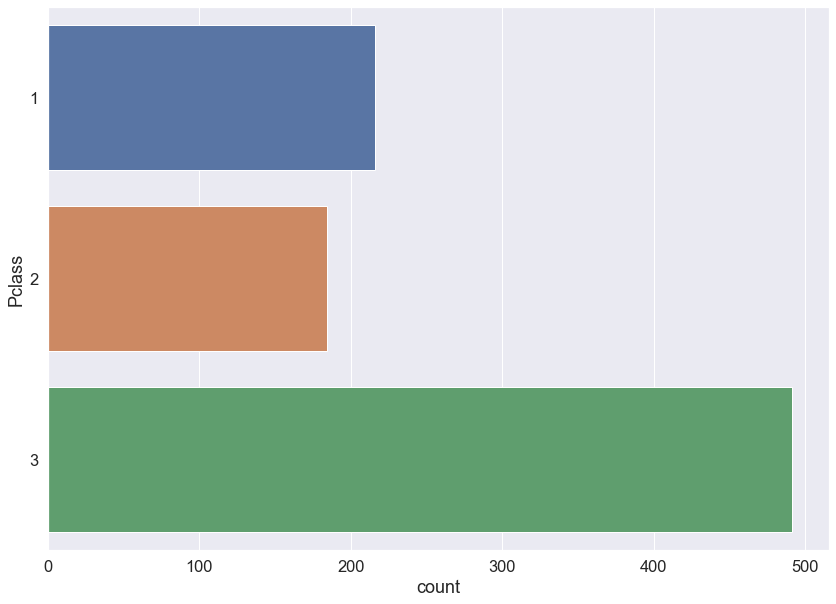

In [13]:
sns.countplot(data = train_data , y = 'Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

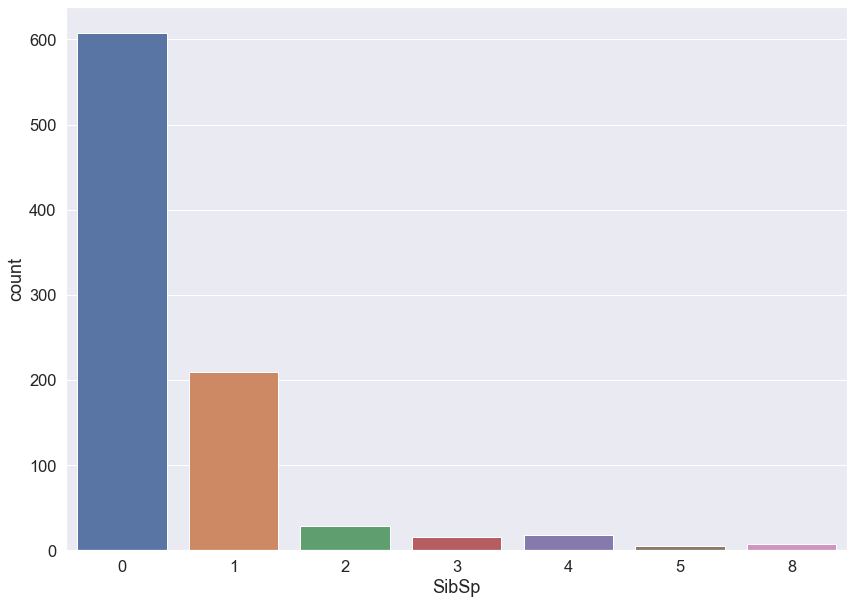

In [14]:
sns.countplot(data = train_data , x = 'SibSp')

<AxesSubplot:xlabel='Parch', ylabel='count'>

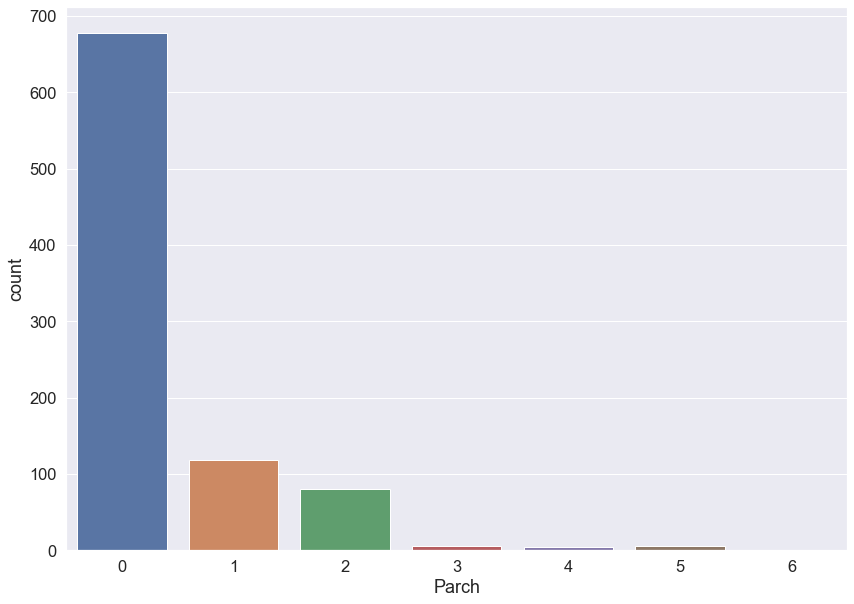

In [15]:
fig, ax = plt.subplots()
sns.countplot(data = train_data , x = 'Parch',ax = ax)

### Distribution Plot of Age

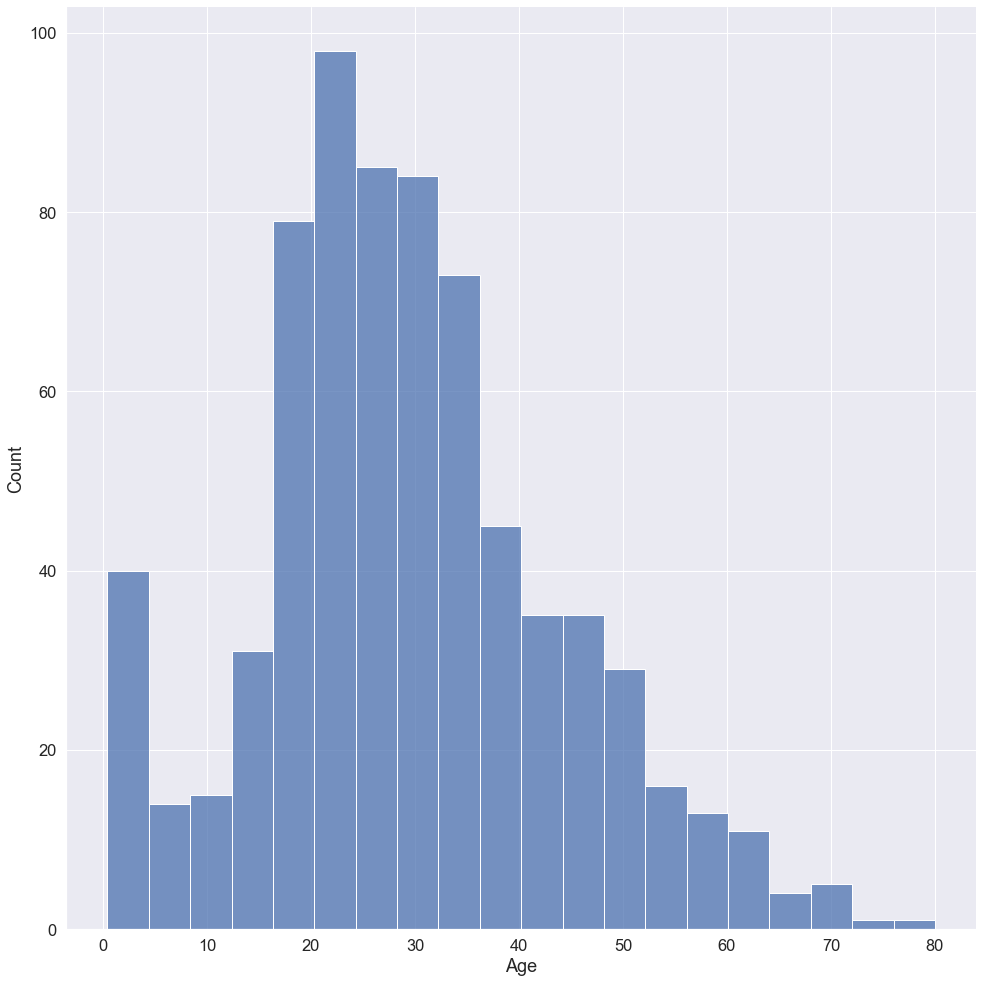

In [16]:
sns.displot(data = train_data['Age'],height=14)

### Distribution Plot for Fare

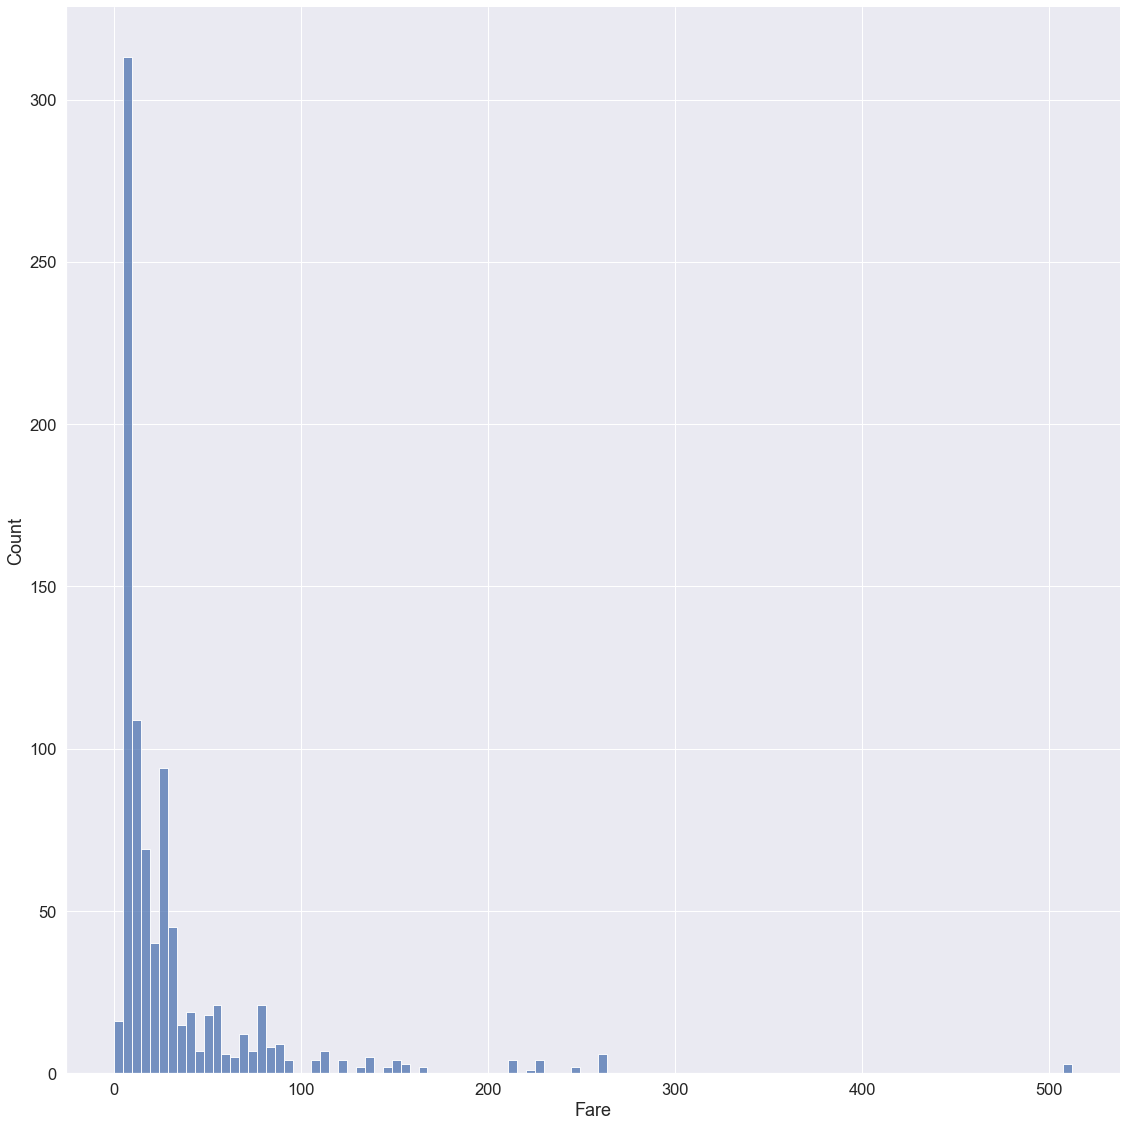

In [17]:
sns.displot(train_data['Fare'], height = 16)

In [18]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Helper function to correct the order of the names (Titles first followed by names)

In [19]:
def fun(name):
    vals = name.split(',')
#     print(vals[::-1])
    vals = vals[::-1]
    new_name = ' '.join(vals)
    return new_name

In [20]:
train_data['Name'] = train_data['Name'].apply(fun)
train_data['Name']

0                                 Mr. Owen Harris Braund
1       Mrs. John Bradley (Florence Briggs Thayer) Cu...
2                                  Miss. Laina Heikkinen
3            Mrs. Jacques Heath (Lily May Peel) Futrelle
4                                Mr. William Henry Allen
                             ...                        
886                                 Rev. Juozas Montvila
887                          Miss. Margaret Edith Graham
888              Miss. Catherine Helen "Carrie" Johnston
889                                 Mr. Karl Howell Behr
890                                   Mr. Patrick Dooley
Name: Name, Length: 891, dtype: object

## Extracting titles from the names

In [21]:
titles = np.array([val.split()[0] for val in train_data['Name']])

In [22]:
set(titles)

{'Capt.',
 'Col.',
 'Don.',
 'Dr.',
 'Jonkheer.',
 'Lady.',
 'Major.',
 'Master.',
 'Miss.',
 'Mlle.',
 'Mme.',
 'Mr.',
 'Mrs.',
 'Ms.',
 'Rev.',
 'Sir.',
 'the'}

In [23]:
train_data['Title'] = titles

In [24]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cu...,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev. Juozas Montvila,male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Miss. Catherine Helen ""Carrie"" Johnston",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,Mr. Karl Howell Behr,male,26.0,0,0,111369,30.0000,C148,C,Mr.


### Countplot for Title

<AxesSubplot:xlabel='Title', ylabel='count'>

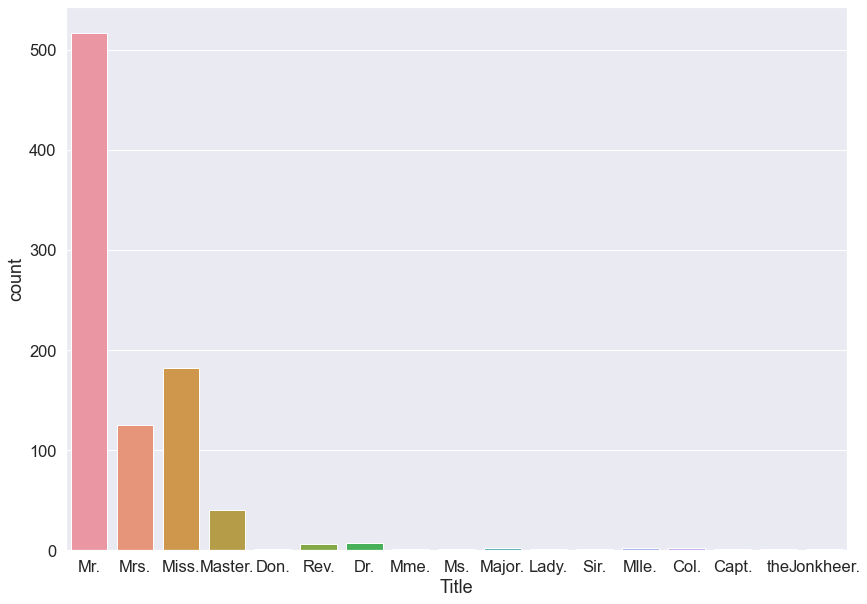

In [25]:
fig, ax = plt.subplots()
sns.countplot(data = train_data , x = 'Title',ax = ax)

## Grouping the dataset w.r.t Title 

In [26]:
train_data.groupby(['Title'])[['Survived','Pclass','SibSp','Parch','Sex']].count()

,Survived,Pclass,SibSp,Parch,Sex
Title,,,,,
Capt.,1,1,1,1,1
Col.,2,2,2,2,2
Don.,1,1,1,1,1
Dr.,7,7,7,7,7
Jonkheer.,1,1,1,1,1
Lady.,1,1,1,1,1
Major.,2,2,2,2,2
Master.,40,40,40,40,40
Miss.,182,182,182,182,182


## Grouping data w.r.t Title and Sex

In [27]:
train_data.groupby(['Title','Sex'])[['Survived','Pclass','SibSp','Parch']].count()

Survived  Pclass  SibSp  Parch
Title     Sex                                   
Capt.     male           1       1      1      1
Col.      male           2       2      2      2
Don.      male           1       1      1      1
Dr.       female         1       1      1      1
          male           6       6      6      6
Jonkheer. male           1       1      1      1
Lady.     female         1       1      1      1
Major.    male           2       2      2      2
Master.   male          40      40     40     40
Miss.     female       182     182    182    182
Mlle.     female         2       2      2      2
Mme.      female         1       1      1      1
Mr.       male         517     517    517    517
Mrs.      female       125     125    125    125
Ms.       female         1       1      1      1
Rev.      male           6       6      6      6
Sir.      male           1       1      1      1
the       female         1       1      1      1

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [29]:
train_data = train_data.drop(['Cabin','Name','Ticket'],axis = 1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Rev.
887,888,1,1,female,19.0,0,0,30.0000,S,Miss.
888,889,0,3,female,NaN,1,2,23.4500,S,Miss.
889,890,1,1,male,26.0,0,0,30.0000,C,Mr.


In [30]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
imputed_age_vals = impute.fit_transform(train_data['Age'].values.reshape(-1,1))
imputed_age_vals

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [24.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [24.  ],
       [31.  ],
       [24.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [24.  ],
       [19.  ],
       [24.  ],
       [24.  ],
       [40.  ],
       [24.  ],
       [24.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [24.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [24.  ],
       [ 3.  ],
       [19.  ],
       [24.  ],
       [24.  ],
       [24.  ],
       [24.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [24.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [31]:
train_data['Age'] = imputed_age_vals
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Rev.
887,888,1,1,female,19.0,0,0,30.0000,S,Miss.
888,889,0,3,female,24.0,1,2,23.4500,S,Miss.
889,890,1,1,male,26.0,0,0,30.0000,C,Mr.


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [33]:
train_data.drop(['PassengerId'],axis = 1 , inplace = True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev.
887,1,1,female,19.0,0,0,30.0000,S,Miss.
888,0,3,female,24.0,1,2,23.4500,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C,Mr.


In [34]:
numerical_columns = train_data.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [35]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Sex', 'Embarked', 'Title']

In [36]:
train_data = train_data.dropna()
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev.
887,1,1,female,19.0,0,0,30.0000,S,Miss.
888,0,3,female,24.0,1,2,23.4500,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C,Mr.


In [37]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
X = train_data.loc[:,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex', 'Embarked', 'Title']]
y = train_data.loc[:,['Survived']]

In [38]:
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
                (
                    OneHotEncoder(
                    handle_unknown='ignore'
                    ),
                    categorical_columns
                )
)

In [39]:
X = column_trans.fit_transform(X)
X

<889x22 sparse matrix of type '<class 'numpy.float64'>'
	with 2667 stored elements in Compressed Sparse Row format>

In [40]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X,y)

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [42]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
test_ids = test_data['PassengerId'].values 
test_ids

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [44]:
test_data['Name'] = test_data['Name'].apply(fun)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr. James Kelly,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs. James (Ellen Needs) Wilkes,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr. Thomas Francis Myles,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr. Albert Wirz,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs. Alexander (Helga E Lindqvist) Hirvonen,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr. Woolf Spector,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona. Fermina Oliva y Ocana,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr. Simon Sivertsen Saether,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr. Frederick Ware,male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
titles = np.array([val.split()[0] for val in test_data['Name']])
set(titles)

{'Col.', 'Dona.', 'Dr.', 'Master.', 'Miss.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.'}

In [46]:
test_data['Title'] = titles
test_data['Title']

0          Mr.
1         Mrs.
2          Mr.
3          Mr.
4         Mrs.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Title, Length: 418, dtype: object

In [47]:
test_data = test_data.drop(['Cabin','Name','Ticket'],axis = 1)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,7.0000,S,Mrs.
2,894,2,male,62.0,0,0,9.6875,Q,Mr.
3,895,3,male,27.0,0,0,8.6625,S,Mr.
4,896,3,female,22.0,1,1,12.2875,S,Mrs.
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,Mr.
414,1306,1,female,39.0,0,0,108.9000,C,Dona.
415,1307,3,male,38.5,0,0,7.2500,S,Mr.
416,1308,3,male,NaN,0,0,8.0500,S,Mr.


In [48]:
imputed_age_vals = impute.transform(test_data['Age'].values.reshape(-1,1))
imputed_age_vals
test_data['Age'] = imputed_age_vals
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,7.0000,S,Mrs.
2,894,2,male,62.0,0,0,9.6875,Q,Mr.
3,895,3,male,27.0,0,0,8.6625,S,Mr.
4,896,3,female,22.0,1,1,12.2875,S,Mrs.
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,24.0,0,0,8.0500,S,Mr.
414,1306,1,female,39.0,0,0,108.9000,C,Dona.
415,1307,3,male,38.5,0,0,7.2500,S,Mr.
416,1308,3,male,24.0,0,0,8.0500,S,Mr.


In [49]:
test_data.drop(['PassengerId'],axis = 1 , inplace = True)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr.
1,3,female,47.0,1,0,7.0000,S,Mrs.
2,2,male,62.0,0,0,9.6875,Q,Mr.
3,3,male,27.0,0,0,8.6625,S,Mr.
4,3,female,22.0,1,1,12.2875,S,Mrs.
...,...,...,...,...,...,...,...,...
413,3,male,24.0,0,0,8.0500,S,Mr.
414,1,female,39.0,0,0,108.9000,C,Dona.
415,3,male,38.5,0,0,7.2500,S,Mr.
416,3,male,24.0,0,0,8.0500,S,Mr.


In [50]:
X_test = test_data.loc[:,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex', 'Embarked', 'Title']]
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Title
0,3,34.5,0,0,7.8292,male,Q,Mr.
1,3,47.0,1,0,7.0000,female,S,Mrs.
2,2,62.0,0,0,9.6875,male,Q,Mr.
3,3,27.0,0,0,8.6625,male,S,Mr.
4,3,22.0,1,1,12.2875,female,S,Mrs.
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,male,S,Mr.
414,1,39.0,0,0,108.9000,female,C,Dona.
415,3,38.5,0,0,7.2500,male,S,Mr.
416,3,24.0,0,0,8.0500,male,S,Mr.


In [51]:
X_test = column_trans.transform(X_test)
X_test

<418x22 sparse matrix of type '<class 'numpy.float64'>'
	with 1253 stored elements in Compressed Sparse Row format>

In [52]:
y_pred = rf_clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
df = pd.DataFrame({
    'PassengerId':test_ids
    ,'Survived':y_pred
})
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
df.to_csv('submission2.csv',index = False)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X,y)

DecisionTreeClassifier()

In [56]:
y_pred = dtree_clf.predict(X_test)

In [57]:
df = pd.DataFrame({
    'PassengerId':test_ids
    ,'Survived':y_pred
})
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
df.to_csv('submission3.csv',index = False)

In [59]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [60]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
ip = Input(shape = (22,))
x = Dense(units = 64 , activation = 'relu')(ip)
x = Dense(units = 64 , activation = 'relu')(x)
x = Dense(units = 64 , activation = 'relu')(x)
op = Dense(units = 2 , activation = 'sigmoid')(x)
model = Model(inputs = ip , outputs = op)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,922
Trainable params: 9,922
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd' , metrics = ['acc'])

In [62]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [64]:
X = X.toarray()
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [67]:
model.fit(X,y,epochs = 20)

Train on 889 samples
Epoch 1/20
889/889 [==============================] - 0s 97us/sample - loss: 0.4824 - acc: 0.7987
Epoch 2/20
889/889 [==============================] - 0s 91us/sample - loss: 0.4820 - acc: 0.7987
Epoch 3/20
889/889 [==============================] - 0s 99us/sample - loss: 0.4819 - acc: 0.7975
Epoch 4/20
889/889 [==============================] - 0s 92us/sample - loss: 0.4821 - acc: 0.7987
Epoch 5/20
889/889 [==============================] - 0s 90us/sample - loss: 0.4820 - acc: 0.7987
Epoch 6/20
889/889 [==============================] - 0s 91us/sample - loss: 0.4818 - acc: 0.7987
Epoch 7/20
889/889 [==============================] - 0s 94us/sample - loss: 0.4815 - acc: 0.7987
Epoch 8/20
889/889 [==============================] - 0s 91us/sample - loss: 0.4814 - acc: 0.7987
Epoch 9/20
889/889 [==============================] - 0s 106us/sample - loss: 0.4814 - acc: 0.7987
Epoch 10/20
889/889 [==============================] - 0s 114us/sample - loss: 0.4813 - acc: 0.7

In [68]:
model.evaluate(X,y)

889/889 [==============================] - 0s 144us/sample - loss: 0.4801 - acc: 0.7987


[0.4801299385265505, 0.79865015]

In [80]:
y_pred = model.predict(X_test.todense())
y_pred

array([[0.5439746 , 0.05991106],
       [0.1657194 , 0.5838079 ],
       [0.5439746 , 0.05991106],
       [0.47672632, 0.08337928],
       [0.1657194 , 0.5838079 ],
       [0.47672632, 0.08337928],
       [0.20832556, 0.5557026 ],
       [0.47672632, 0.08337928],
       [0.1143482 , 0.6261321 ],
       [0.47672632, 0.08337928],
       [0.47672632, 0.08337928],
       [0.47672632, 0.08337928],
       [0.1657194 , 0.5838079 ],
       [0.47672632, 0.08337928],
       [0.1657194 , 0.5838079 ],
       [0.1143482 , 0.6261321 ],
       [0.5439746 , 0.05991106],
       [0.38175693, 0.14608274],
       [0.27047256, 0.5144344 ],
       [0.1143482 , 0.6261321 ],
       [0.38175693, 0.14608274],
       [0.2652693 , 0.3578852 ],
       [0.1657194 , 0.5838079 ],
       [0.38175693, 0.14608274],
       [0.1143482 , 0.6261321 ],
       [0.47672632, 0.08337928],
       [0.12142356, 0.6390056 ],
       [0.38175693, 0.14608274],
       [0.47672632, 0.08337928],
       [0.38175693, 0.14608274],
       [0.

In [81]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
df = pd.DataFrame({
    'PassengerId':test_ids
    ,'Survived':y_pred
})
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
df.to_csv('submission4.csv',index = False)